In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Neural Network suggested in the paper was with one hidden layer of 50 neurons.

In [93]:
N = nn.Sequential(
    nn.Linear(1, 50), 
    nn.Sigmoid(), 
    nn.Linear(50,1, bias=False))

In [94]:
A=0 #initial condition
Psi_t = lambda x: A + x * N(x) #trial solution

#### Try Problem 2 from paper
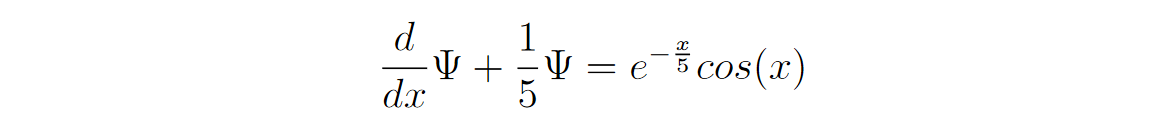

In [95]:
f = lambda x, Psi: torch.exp(-x / 5.0) * torch.cos(x) - Psi / 5.0

In [96]:
def loss(x):
    x.requires_grad = True
    outputs = Psi_t(x)
    Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs),
                        create_graph=True)[0]
    return  torch.mean( ( Psi_t_x - f(x, outputs) )  ** 2)

In [97]:
optimizer = torch.optim.Adam(N.parameters()) #The optimizer used in paper was BFGS
x = torch.Tensor(np.linspace(0, 5, 100)[:, None]) #[0,2]

In [100]:
def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()
    print(f"loss: {l}")
    return l

for i in range(1000):
    optimizer.step(closure)
    print(f"epoch: {i+1}")

loss: 0.0007454132428392768
epoch: 1
loss: 0.0007431063568219543
epoch: 2
loss: 0.000740810064598918
epoch: 3
loss: 0.0007385227363556623
epoch: 4
loss: 0.0007362447795458138
epoch: 5
loss: 0.0007339770090766251
epoch: 6
loss: 0.0007317173294723034
epoch: 7
loss: 0.0007294684182852507
epoch: 8
loss: 0.0007272274815477431
epoch: 9
loss: 0.0007249958580359817
epoch: 10
loss: 0.0007227750029414892
epoch: 11
loss: 0.0007205632864497602
epoch: 12
loss: 0.0007183596608228981
epoch: 13
loss: 0.0007161667454056442
epoch: 14
loss: 0.000713981338776648
epoch: 15
loss: 0.0007118053617887199
epoch: 16
loss: 0.0007096388726495206
epoch: 17
loss: 0.0007074819295667112
epoch: 18
loss: 0.0007053329609334469
epoch: 19
loss: 0.0007031939458101988
epoch: 20
loss: 0.0007010619156062603
epoch: 21
loss: 0.0006989405956119299
epoch: 22
loss: 0.0006968273082748055
epoch: 23
loss: 0.0006947229849174619
epoch: 24
loss: 0.0006926274509169161
epoch: 25
loss: 0.0006905411137267947
epoch: 26
loss: 0.000688462634570

analytical solution vs the NN solution:

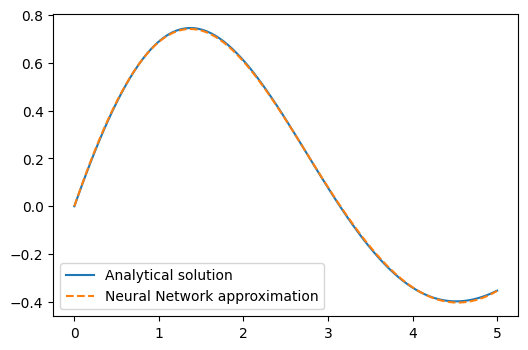

In [102]:
with torch.no_grad():
    yy = Psi_t(torch.Tensor(xx)).numpy()
yt = np.exp(-xx / 5.0) * np.sin(xx)
fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label='Analytical solution')
ax.plot(xx, yy, '--', label='Neural Network approximation')
plt.legend(loc='best');

### Try to express the derivative analytically:

In [49]:
x = torch.unsqueeze(torch.linspace(0, 5, 100), dim=1) 
y = torch.exp(-(x/5))*torch.sin(x)

In [52]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

def sigmoid_grad(x):
    return sigmoid(x)*(1- sigmoid(x))

def neural_network(x,weights,bias):
    s_z = sigmoid(torch.matmul(x,weights[0])+bias[0])
    return torch.matmul(s_z, weights[1]) + bias[1]

def dN_dx(weights, x):
    s_z_grad = sigmoid_grad(torch.matmul(x,weights[0])+bias[0]) #100x10
    mul=torch.mul(weights[0].T,weights[1])
    return torch.matmul(s_z_grad,mul)

In [53]:
#initialize weights and biases
weights = [torch.randn((1,10),  requires_grad=True), torch.randn((10,1),  requires_grad=True)]
bias = [torch.randn(10,  requires_grad=True), torch.randn(1,  requires_grad=True)]

In [54]:
A=0 #initial condition
Psi_t = lambda x: A + x * neural_network(x,weights,bias) #trial solution

In [55]:
f = lambda x, Psi: torch.exp(-x / 5.0) * torch.cos(x) - Psi / 5.0

In [56]:
def error(x):

    x.requires_grad = True
    psi = Psi_t(x)
    ddN =  dN_dx(weights, x)
    Psi_t_x = neural_network(x,weights,bias) + x*ddN


    return  torch.mean( ( Psi_t_x - f(x, psi) )  ** 2)

In [68]:
epochs=5000
lr=0.01
for i in range(epochs):
    loss = error(x)
    loss.backward()
    weights[0].data -= lr*weights[0].grad.data
    weights[1].data -= lr*weights[1].grad.data
    bias[0].data -= lr*bias[0].grad.data
    bias[1].data -= lr*bias[1].grad.data

 
    weights[0].grad.zero_()
    weights[1].grad.zero_()
    bias[0].grad.zero_()
    bias[1].grad.zero_()

    print("Loss: ", loss.item())

Loss:  0.00044288416393101215
Loss:  0.00044265578617341816
Loss:  0.000442428543465212
Loss:  0.00044219999108463526
Loss:  0.0004419723409228027
Loss:  0.0004417451564222574
Loss:  0.00044151744805276394
Loss:  0.00044128973968327045
Loss:  0.0004410635447129607
Loss:  0.00044083604007028043
Loss:  0.00044060975778847933
Loss:  0.0004403843486215919
Loss:  0.0004401566693559289
Loss:  0.00043992989230901003
Loss:  0.0004397033480927348
Loss:  0.00043947764788754284
Loss:  0.0004392516566440463
Loss:  0.00043902400648221374
Loss:  0.00043880142038688064
Loss:  0.0004385757492855191
Loss:  0.00043834897223860025
Loss:  0.00043812478543259203
Loss:  0.0004378980374895036
Loss:  0.00043767396709881723
Loss:  0.0004374477139208466
Loss:  0.00043722419650293887
Loss:  0.0004369995731394738
Loss:  0.00043677666690200567
Loss:  0.0004365503555163741
Loss:  0.00043632651795633137
Loss:  0.00043610238935798407
Loss:  0.000435880123404786
Loss:  0.0004356555291451514
Loss:  0.000435433234088122

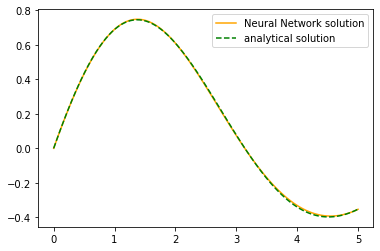

In [69]:
x = torch.unsqueeze(torch.linspace(0, 5, 100), dim=1) 
y = torch.exp(-(x/5))*torch.sin(x)
psi_trial = Psi_t(x)
fig, ax = plt.subplots()
ax.plot(x.data.numpy(), psi_trial.data.numpy(), 'orange', label ='Neural Network solution')
ax.plot(x.data.numpy(), y.data.numpy(), 'g--', label ='analytical solution')

plt.legend()

### eulers

In [78]:
a=0
b=5
y_euler=torch.ones(N)
y_euler[0]=0
x = torch.Tensor(np.linspace(0, 5, 100)[:, None]) 
N=100
h=(b-a)/N
for i in range(N-1):
    y_euler[i+1]=y_euler[i] +h * ((-1/5)*y_euler[i] +torch.exp(-x[i]/5)*torch.cos(x[i]))

In [80]:
y = torch.exp(-(x/5))*torch.sin(x)

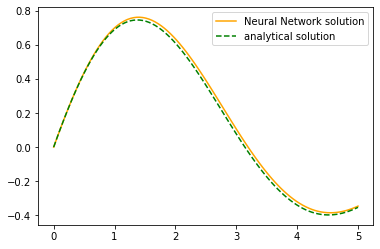

In [82]:
fig, ax = plt.subplots()
ax.plot(x.data.numpy(), y_euler.data.numpy(), 'orange', label ='Neural Network solution')
ax.plot(x.data.numpy(), y.data.numpy(), 'g--', label ='analytical solution')

plt.legend()

In [ ]:
def loss(x):

    x.requires_grad = True
    outputs = Psi_t(x)
    dN_dx = 
    Psi_t_x = N(x) + x*dN_dx
    #Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs),
                        create_graph=True)[0]

    return  torch.mean( ( Psi_t_x - f(x, outputs) )  ** 2)

In [ ]:
optimizer = torch.optim.LBFGS(N.parameters()) #The optimizer used in paper was BFGS
x = torch.Tensor(np.linspace(0, 5, 100)[:, None]) #[0,2]

In [ ]:
def closure():

    optimizer.zero_grad()
    l = loss(x)
    l.backward()
    print(f"loss: {l}")
    return l

for i in range(10):
    optimizer.step(closure)
    print(f"epoch: {i+1}")

Second order:

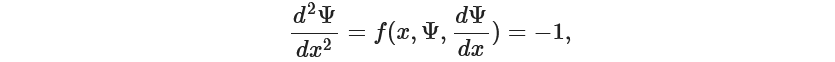

Dirichlet boundary conditions
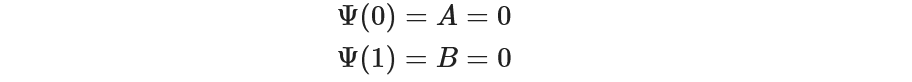

Trial solution
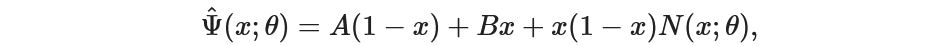

In [9]:
N = nn.Sequential(nn.Linear(1, 50), nn.Sigmoid(), nn.Linear(50,1, bias=False))
A = 0.
B = 0.
Psi_t = lambda x: A*(1-x) + B * x + (1-x)* x * N(x)
f = lambda x, Psi: -1

In [10]:
def loss(x):

    x.requires_grad = True
    outputs = Psi_t(x)

    #we need Psi_x_x 
    #calculating gradient twice 

    Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs),
                                            create_graph=True)[0]
    Psi_t_x_x = torch.autograd.grad(Psi_t_x, x, grad_outputs=torch.ones_like(Psi_t_x),
                                            create_graph=True )[0]

    return torch.mean((Psi_t_x_x - f(x, outputs)) ** 2)

In [11]:
#Using BFGS as optimizer
optimizer = torch.optim.LBFGS(N.parameters())
x = torch.Tensor(np.linspace(0, 1, 100)[:, None])

In [12]:
def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()
    return l

for i in range(10):
    optimizer.step(closure)

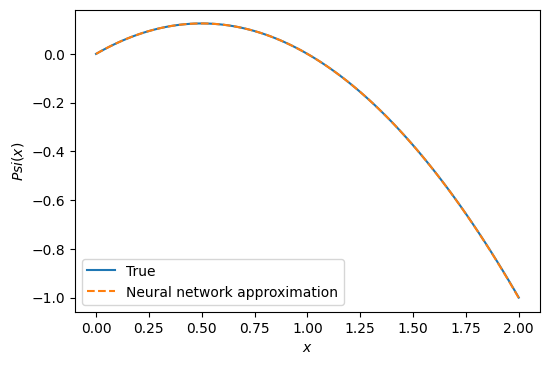

In [13]:
xx = np.linspace(0, 2, 100)[:, None]

with torch.no_grad():
    yy = Psi_t(torch.Tensor(xx)).numpy()

yt = (0.5) * (-xx**2 + xx ) #actual function pts

fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label='True')
ax.plot(xx, yy, '--', label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$Psi(x)$')
plt.legend(loc='best');